<a href="https://colab.research.google.com/github/felipecarvalho180/initial_data_science/blob/main/introducao_a_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as notas em geral

In [63]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.columns = ['userId', 'movieId', 'rating', 'moment']
# notas['rating'].unique()
notas.rating.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: rating, dtype: float64

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: ylabel='Frequency'>

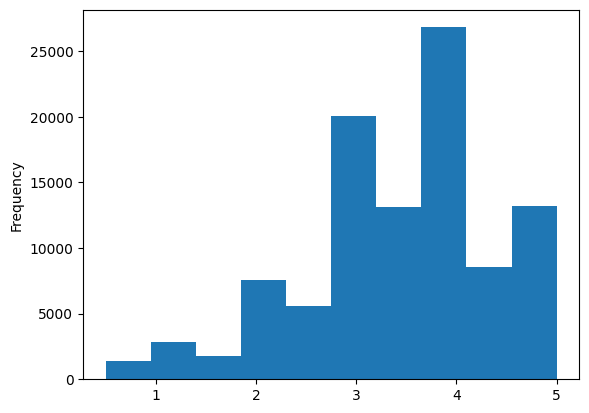

In [66]:
notas.rating.plot(kind='hist')

In [67]:
print('Média:', notas.rating.mean())
print('Mediana:', notas.rating.median())

Média: 3.501556983616962
Mediana: 3.5


In [68]:
notas.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<Axes: >

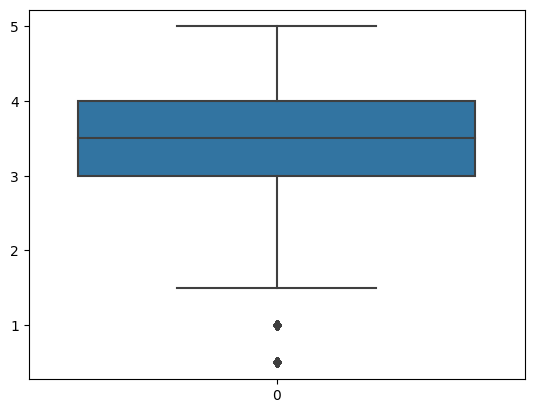

In [69]:
import seaborn as sns

sns.boxplot(notas.rating)

# Buscando os filmes

In [70]:
import pandas as pd
filmes = pd.read_csv('movies.csv')

# Analisando algumas notas especificas por filme

In [71]:
notas.query("movieId==1").rating.mean()

3.9209302325581397

In [72]:
medias_pro_filme = notas.groupby("movieId").mean()["rating"]
medias_pro_filme

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

# TMDB Movies

In [73]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [74]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Categorica ordinal

primeiro grau
segundo grau
terceiro grau

1 < 2 < 3

In [10]:
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [13]:
language_count = tmdb["original_language"].value_counts().to_frame().reset_index()
language_count.columns = ["language", "total"]
language_count.head()

,language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='language', ylabel='total'>

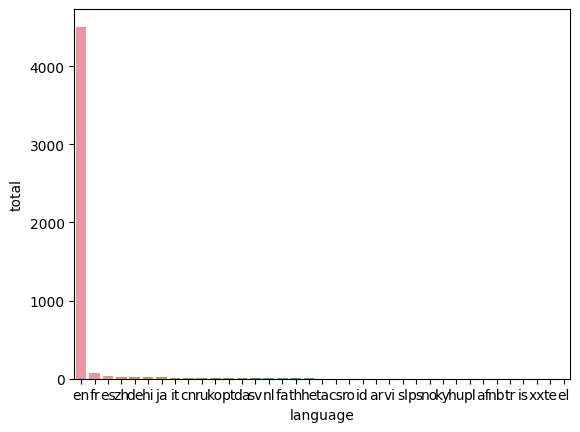

In [17]:
sns.barplot(x="language", y="total", data = language_count)

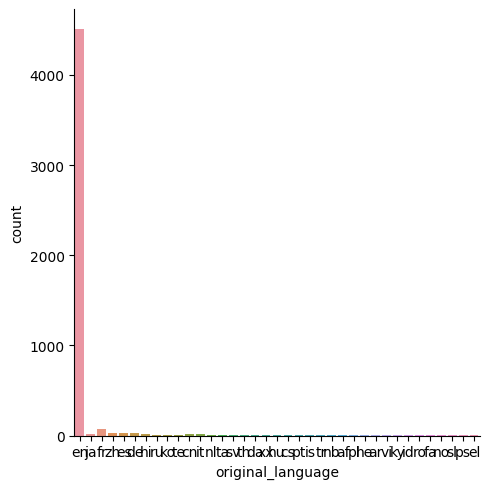

In [18]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f3060636650>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

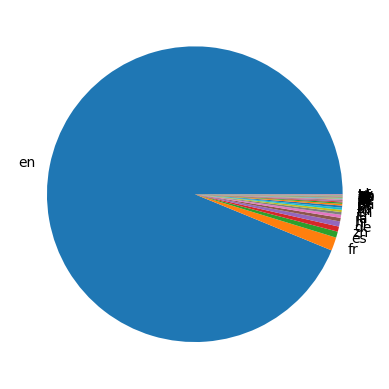

In [20]:
from seaborn.widgets import plt

plt.pie(language_count.total, labels = language_count.language)

In [32]:
total_by_language = tmdb.original_language.value_counts()
general_total = total_by_language.sum()
english_total = total_by_language.loc["en"]
language_rest = general_total - english_total
print(general_total, language_rest)

4803 298


<Axes: xlabel='language', ylabel='total'>

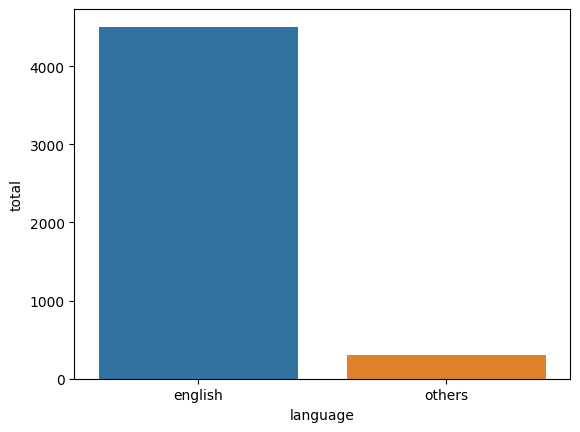

In [40]:
data = {
    "language": ["english", "others"],
    "total": [english_total, language_rest]
}

data = pd.DataFrame(data)
data
sns.barplot(x = "language", y = "total", data = data)

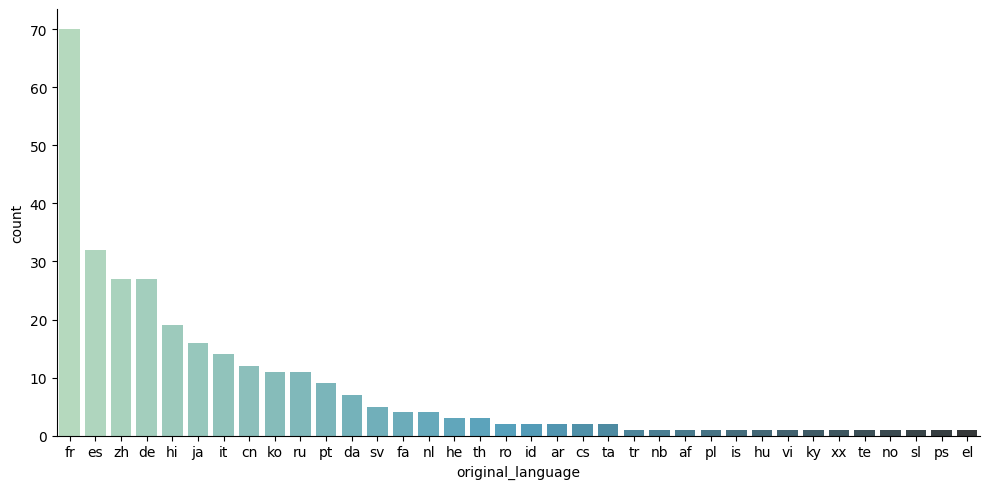

In [53]:
total_by_language_other_than_english = tmdb.query("original_language != 'en'")
total_by_language_other_than_english_index = tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(
    x = "original_language",
    kind = "count",
    data = total_by_language_other_than_english,
    aspect = 2,
    palette = "GnBu_d",
    order = total_by_language_other_than_english_index.index)

In [58]:
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [85]:
toy_story_rating = notas.query("movieId == 1")
jumanji_rating = notas.query("movieId == 2")
print(len(toy_story_rating), len(jumanji_rating))

215 110


In [88]:
print("A média do filme Toy Story é: %.2f" % toy_story_rating.rating.mean())
print("A média do filme Jumanji é: %.2f" % jumanji_rating.rating.mean())

A média do filme Toy Story é: 3.92
A média do filme Jumanji é: 3.43


In [92]:
import numpy as np
movie_1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
movie_2 = np.append(np.array([1] * 10), np.array([5] * 10))

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

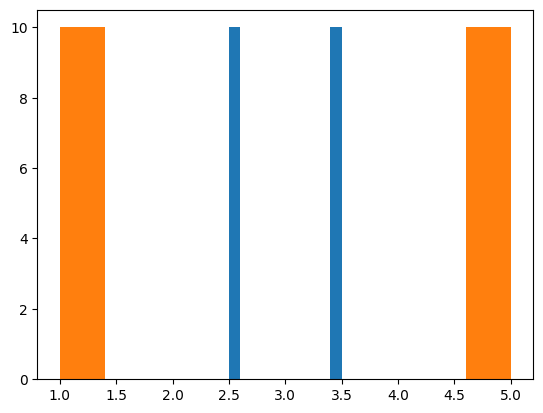

In [94]:
plt.hist(movie_1)
plt.hist(movie_2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f305e9d6d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f305e9d45e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f305e9d72e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f305e9d7580>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f305e9d5300>,
 'means': []}

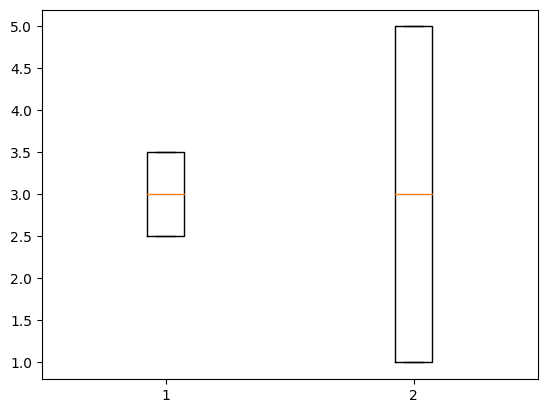

In [95]:
plt.boxplot([movie_1, movie_2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f305e527730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f305e527c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f305e527490>,
 'medians': [<matplotlib.lines.Line2D at 0x7f305e5281f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f305e528490>,
 'means': []}

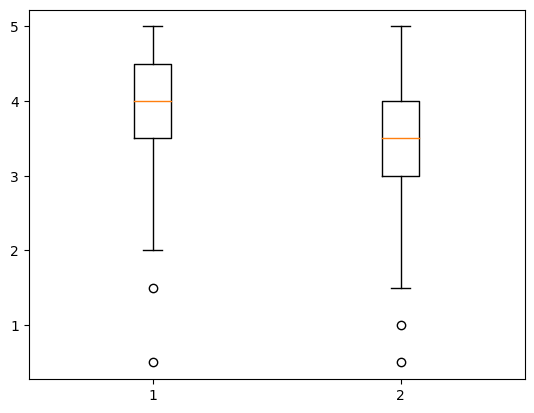

In [96]:
plt.boxplot([toy_story_rating.rating, jumanji_rating.rating])

<Axes: xlabel='movieId', ylabel='rating'>

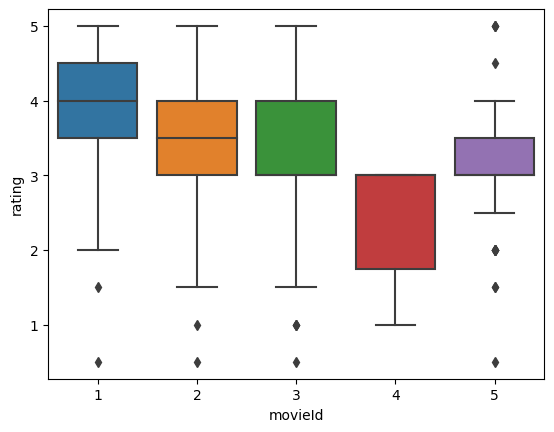

In [99]:
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId <= 5"))

In [100]:
print("Desvio padrão",np.std(movie_1), np.std(movie_2))

Desvio padrão 0.5 2.0
